In [1]:
# Importing all the libaries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error

In [2]:
# Ignoring the warnings.
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Changing the working directory.
import os
os.getcwd()
os.chdir(r'C:\Users\nikhi\Desktop\MSc DS\4-Data Science with ML\project')

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\nikhi\\Desktop\\MSc DS\\4-Data Science with ML\\project'

In [6]:
import pandas as pd

# Correct paths
features_df = pd.read_csv('/DSML /dengue_features_train.csv')
labels_df = pd.read_csv('/DSML /dengue_labels_train.csv')

print(features_df.head())
print(labels_df.head())


  city  year  weekofyear week_start_date   ndvi_ne   ndvi_nw   ndvi_se  \
0   sj  1990          18      1990-04-30  0.122600  0.103725  0.198483   
1   sj  1990          19      1990-05-07  0.169900  0.142175  0.162357   
2   sj  1990          20      1990-05-14  0.032250  0.172967  0.157200   
3   sj  1990          21      1990-05-21  0.128633  0.245067  0.227557   
4   sj  1990          22      1990-05-28  0.196200  0.262200  0.251200   

    ndvi_sw  precipitation_amt_mm  reanalysis_air_temp_k  ...  \
0  0.177617                 12.42             297.572857  ...   
1  0.155486                 22.82             298.211429  ...   
2  0.170843                 34.54             298.781429  ...   
3  0.235886                 15.36             298.987143  ...   
4  0.247340                  7.52             299.518571  ...   

   reanalysis_precip_amt_kg_per_m2  reanalysis_relative_humidity_percent  \
0                            32.00                             73.365714   
1           

In [4]:
# coded by Nikhil
# Reading the files.
features_df = pd.read_csv('dengue_features_train.csv')
labels_df = pd.read_csv('dengue_labels_train.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'dengue_features_train.csv'

In [8]:
# coded by Nikhil
# Merging both the files in labels file features.
data = pd.merge(features_df, labels_df, on=['city', 'year', 'weekofyear'])
data.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


In [9]:
# coded by Nikhil
# This codes gives an overall information about the input data. It displays the datatype and the count of each features in the dataset.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   city                                   1456 non-null   object 
 1   year                                   1456 non-null   int64  
 2   weekofyear                             1456 non-null   int64  
 3   week_start_date                        1456 non-null   object 
 4   ndvi_ne                                1262 non-null   float64
 5   ndvi_nw                                1404 non-null   float64
 6   ndvi_se                                1434 non-null   float64
 7   ndvi_sw                                1434 non-null   float64
 8   precipitation_amt_mm                   1443 non-null   float64
 9   reanalysis_air_temp_k                  1446 non-null   float64
 10  reanalysis_avg_temp_k                  1446 non-null   float64
 11  rean

In [10]:
# coded by Nikhil
# This code gives the statistics information like mean, std about each features.
data.describe()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
count,1456.000000,1456.000000,1262.000000,1404.000000,1434.000000,1434.000000,1443.000000,1446.000000,1446.000000,1446.000000,...,1446.000000,1443.000000,1446.000000,1446.000000,1413.000000,1413.000000,1436.000000,1442.000000,1434.000000,1456.000000
mean,2001.031593,26.503434,0.142294,0.130553,0.203783,0.202305,45.760388,298.701852,299.225578,295.246356,...,82.161959,45.760388,16.746427,4.903754,27.185783,8.059328,32.452437,22.102150,39.326360,24.675137
std,5.408314,15.019437,0.140531,0.119999,0.073860,0.083903,43.715537,1.362420,1.261715,1.527810,...,7.153897,43.715537,1.542494,3.546445,1.292347,2.128568,1.959318,1.574066,47.455314,43.596000
min,1990.000000,1.000000,-0.406250,-0.456100,-0.015533,-0.063457,0.000000,294.635714,294.892857,289.642857,...,57.787143,0.000000,11.715714,1.357143,21.400000,4.528571,26.700000,14.700000,0.000000,0.000000
25%,1997.000000,13.750000,0.044950,0.049217,0.155087,0.144209,9.800000,297.658929,298.257143,294.118929,...,77.177143,9.800000,15.557143,2.328571,26.300000,6.514286,31.100000,21.100000,8.700000,5.000000
50%,2002.000000,26.500000,0.128817,0.121429,0.196050,0.189450,38.340000,298.646429,299.289286,295.640714,...,80.301429,38.340000,17.087143,2.857143,27.414286,7.300000,32.800000,22.200000,23.850000,12.000000
75%,2005.000000,39.250000,0.248483,0.216600,0.248846,0.246982,70.235000,299.833571,300.207143,296.460000,...,86.357857,70.235000,17.978214,7.625000,28.157143,9.566667,33.900000,23.300000,53.900000,28.000000
max,2010.000000,53.000000,0.508357,0.454429,0.538314,0.546017,390.600000,302.200000,302.928571,298.450000,...,98.610000,390.600000,20.461429,16.028571,30.800000,15.800000,42.200000,25.600000,543.300000,461.000000


#  Exploratory Data Analysis.

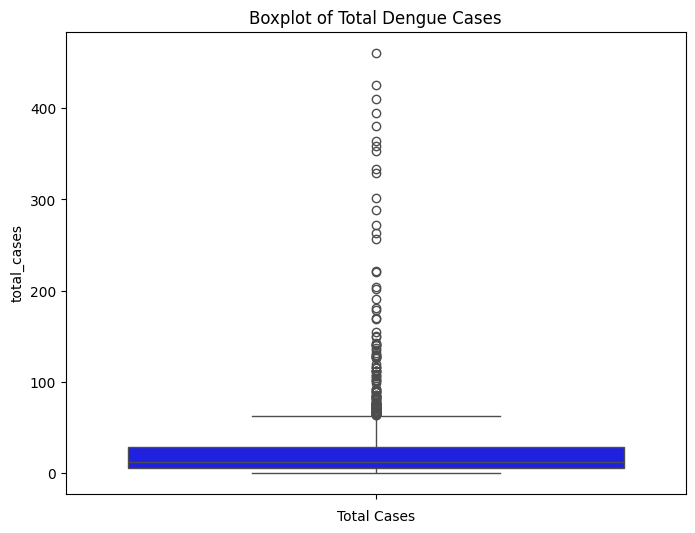

In [11]:
# coded by Nisarga
# Boxplot of Total Cases feature.
plt.figure(figsize=(8, 6))
sns.boxplot(data['total_cases'], color='blue')
plt.title('Boxplot of Total Dengue Cases')
plt.xlabel('Total Cases')
plt.show()

# We can see there are some outliers in the total-cases feature.

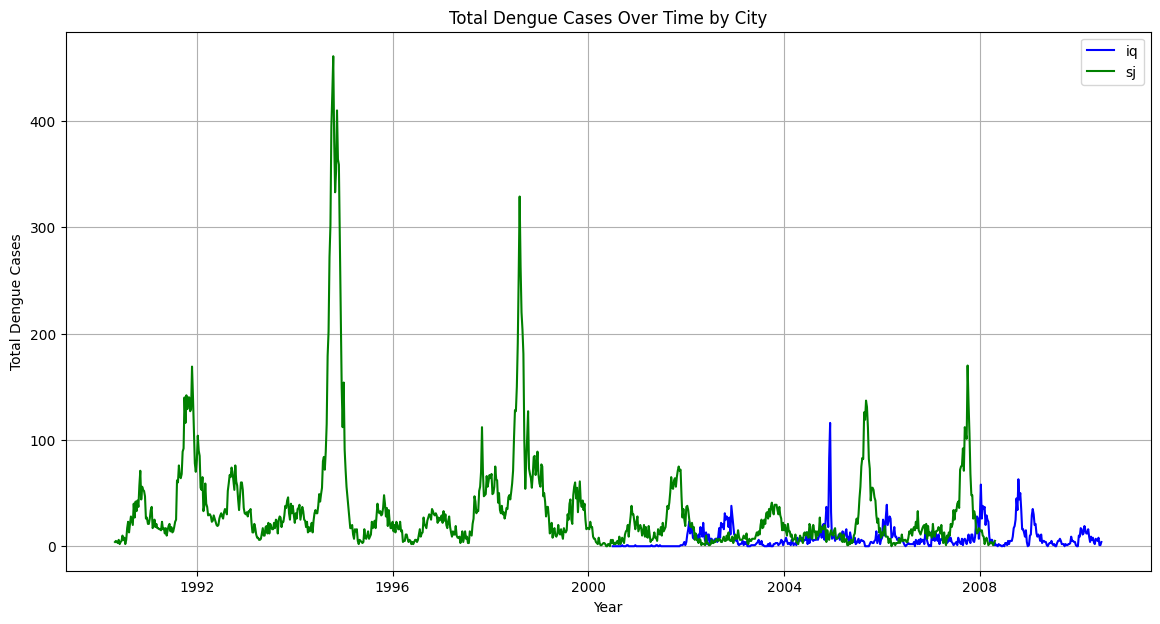

In [12]:
# coded by Nisarga
# Total Dengue Cases Over Time in each city. There is a huge spike in numbers between the year 1992 and 1996
# and Majority of the dengue cases is in the sj cities.
plt.figure(figsize=(14, 7))
colors = ['blue', 'green']
for (label, df), color in zip(data.groupby('city'), colors):
    plt.plot(pd.to_datetime(df['week_start_date']), df['total_cases'], label=label, color=color,  linestyle='-')

plt.title('Total Dengue Cases Over Time by City')
plt.xlabel('Year')
plt.ylabel('Total Dengue Cases')
plt.legend()
plt.grid(True)
plt.show()

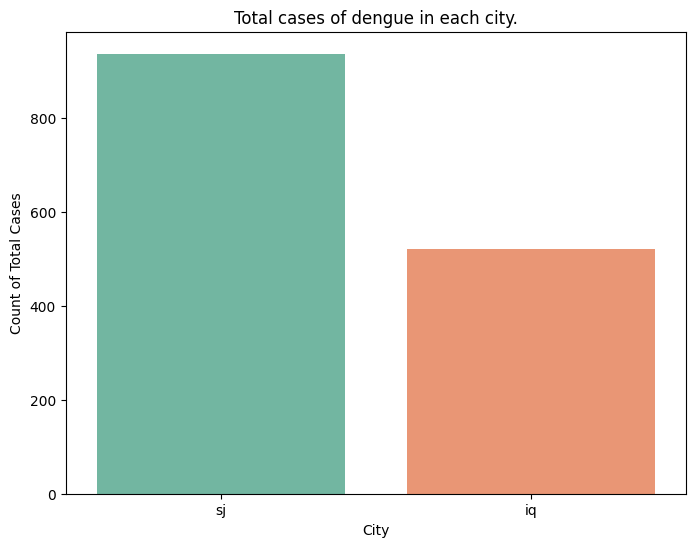

In [13]:
# coded by Nisarga
# Total cases of dengue in each city.
plt.figure(figsize=(8, 6))
sns.countplot(x='city', data=data, palette='Set2')
plt.title('Total cases of dengue in each city.')
plt.xlabel('City')
plt.ylabel('Count of Total Cases')
plt.show()

# THe total cases of dengue is nearly double the amount in sj cities when compared to the iq column.

In [14]:
# coded by Nisarga
# Correlation Matrix of dependent variables.
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# We can observe  features like ndvi_nw, reanalysis_sat_precip_amt_mm, reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k
# have very high correlation when compared to other features marking their importance in predicting the dengue caese.

ValueError: could not convert string to float: 'sj'

<Figure size 2000x1000 with 0 Axes>

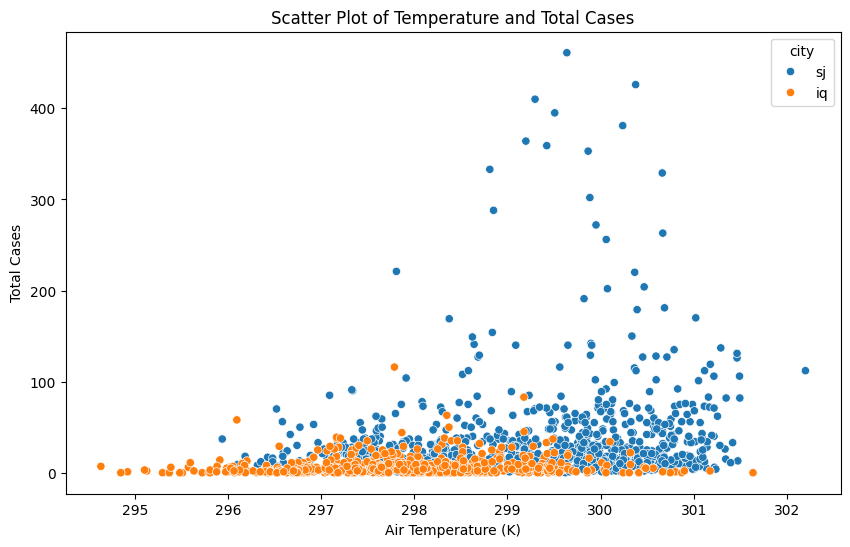

In [15]:
# coded by Kevein
# Scatter Plot of Temperature and Total Cases
plt.figure(figsize=(10, 6))
sns.scatterplot(x='reanalysis_air_temp_k', y='total_cases', data=data, hue='city')
plt.title('Scatter Plot of Temperature and Total Cases')
plt.xlabel('Air Temperature (K)')
plt.ylabel('Total Cases')
plt.show()

# This scatter plots shows there are many cases of dengue in sj cities when compairing using the air temperature feature.

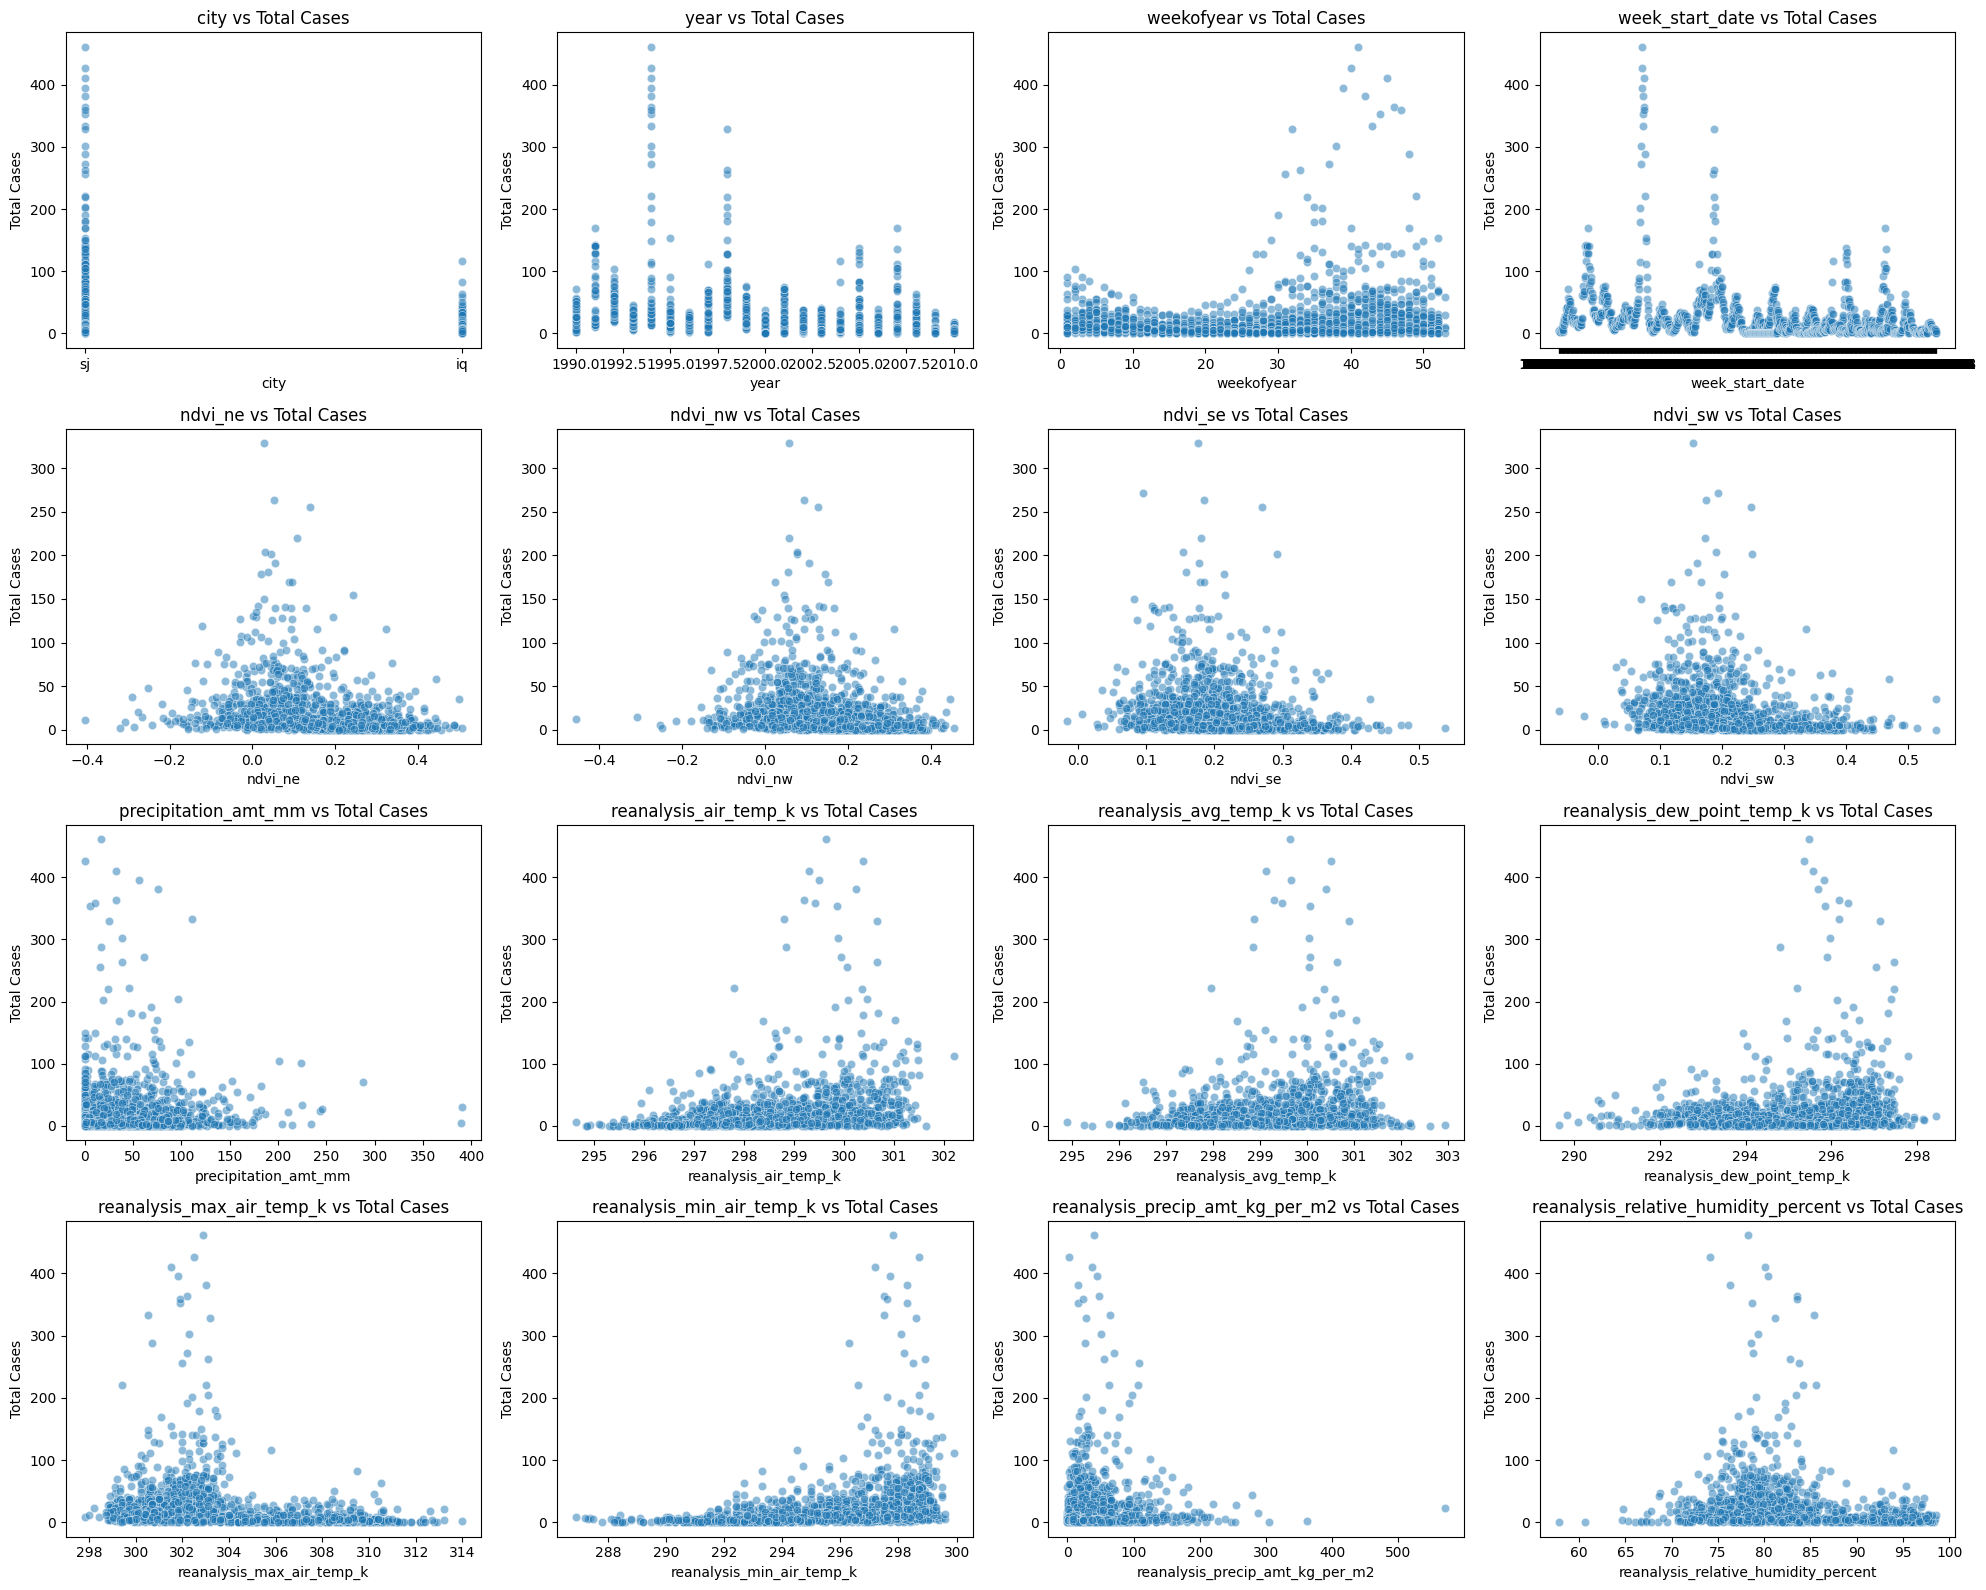

In [16]:
# coded by Kevein
# Scatter plot between all the Features and Total Cases
num_features_to_plot = min(len(data.columns) - 1, 16)
num_rows = (num_features_to_plot - 1) // 4 + 1
num_cols = min(num_features_to_plot, 4)

plt.figure(figsize=(5*num_cols, 4*num_rows))
for i, col in enumerate(data.columns[:-1][:num_features_to_plot]):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.scatterplot(x=col, y='total_cases', data=data, marker='o', alpha=0.5)
    plt.title(f'{col} vs Total Cases')
    plt.xlabel(col)
    plt.ylabel('Total Cases')
plt.tight_layout()
plt.show()


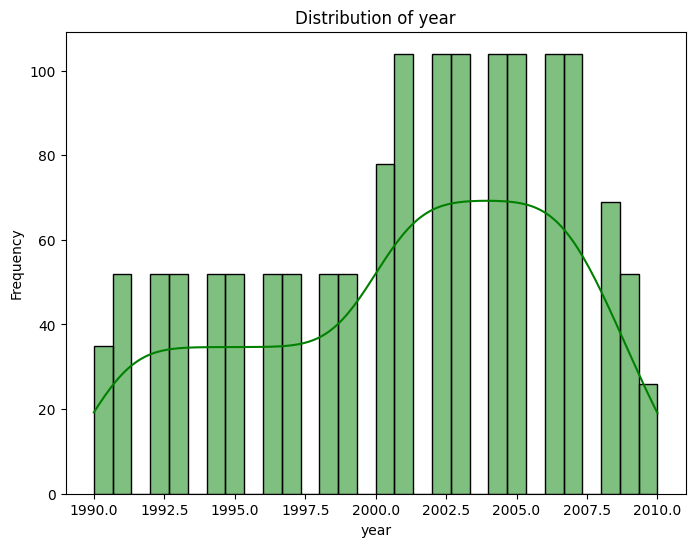

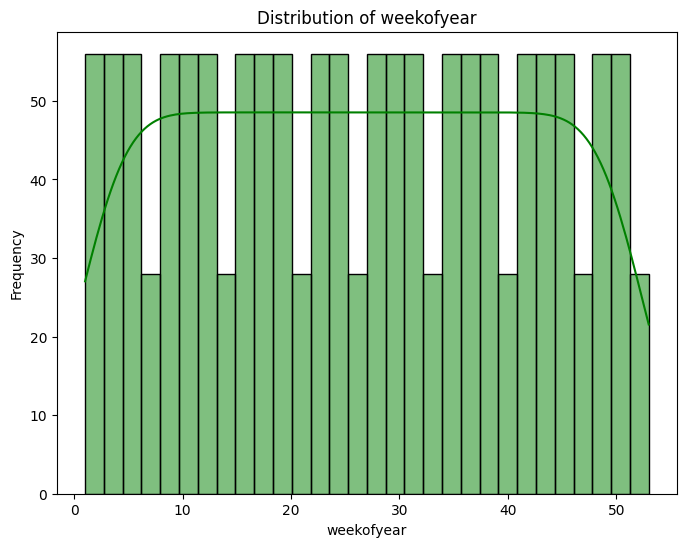

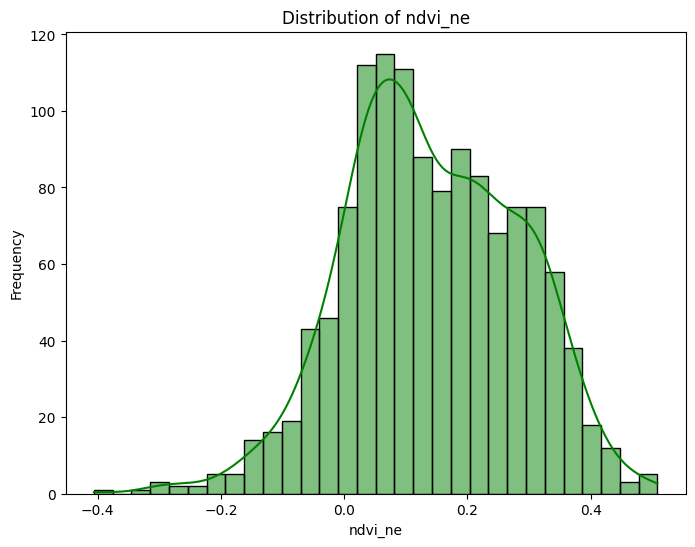

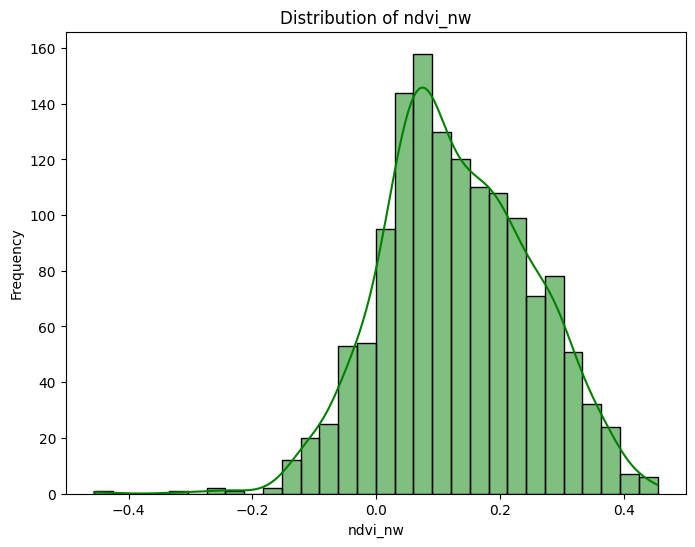

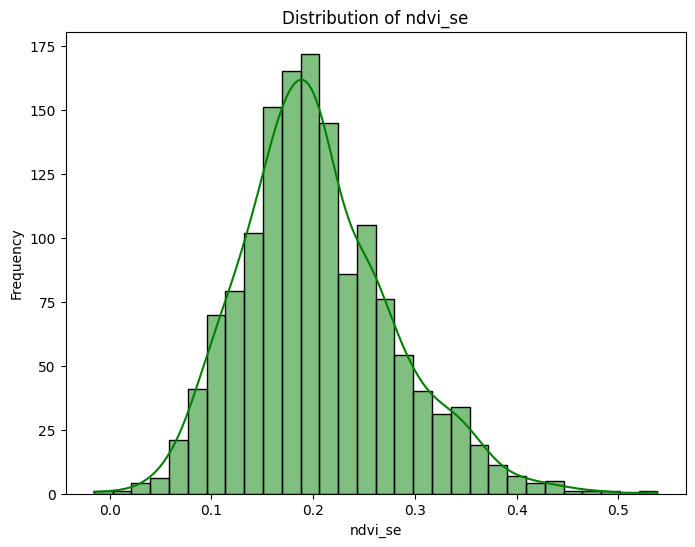

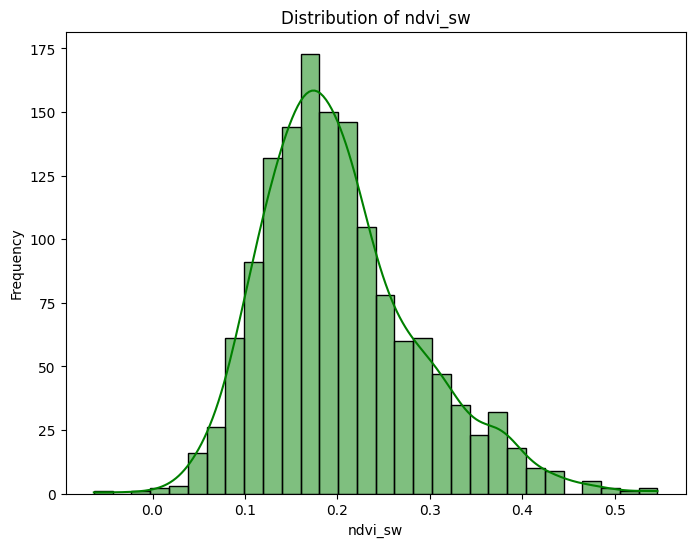

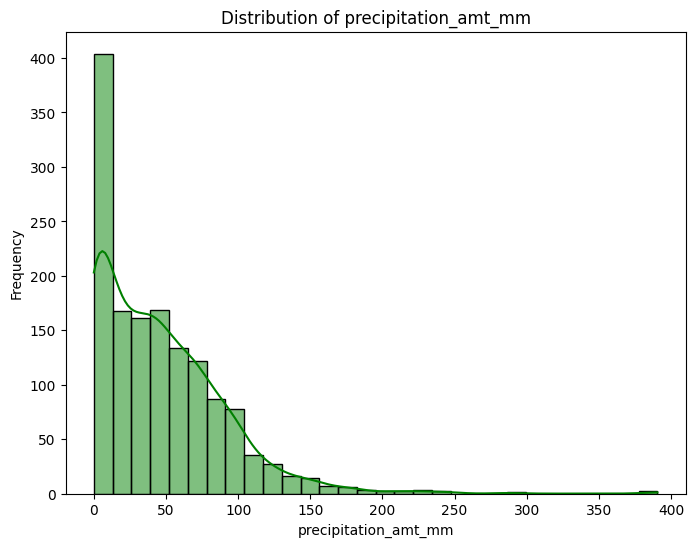

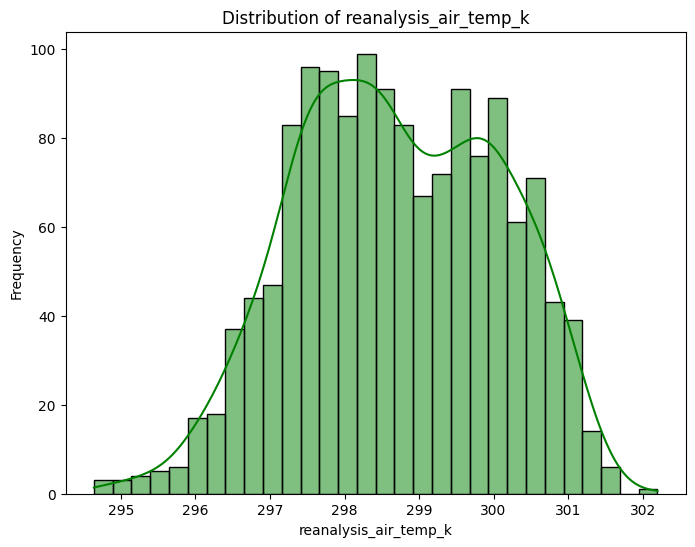

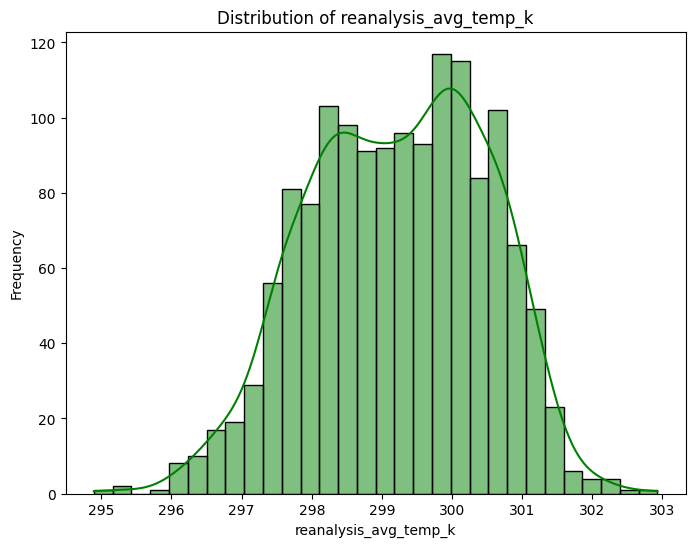

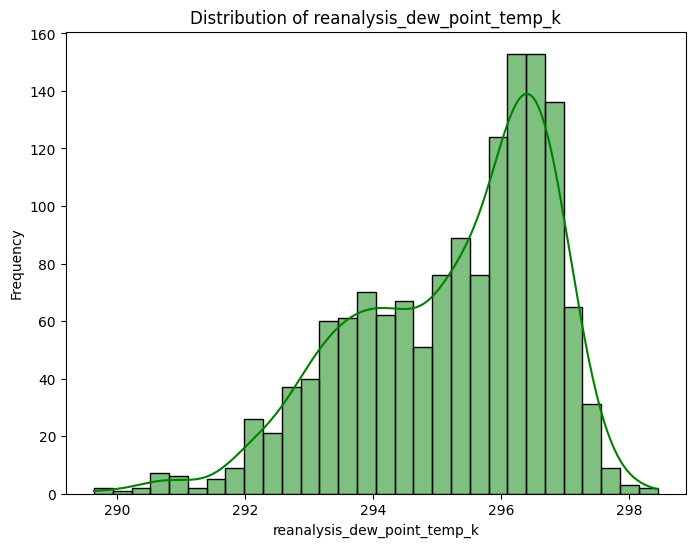

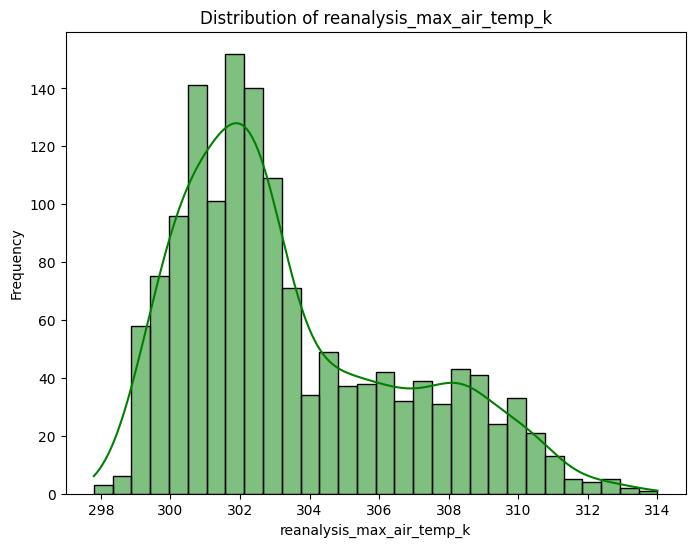

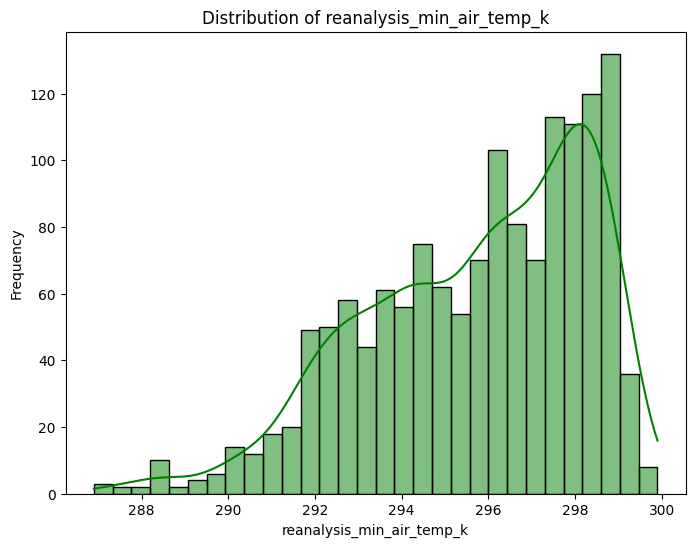

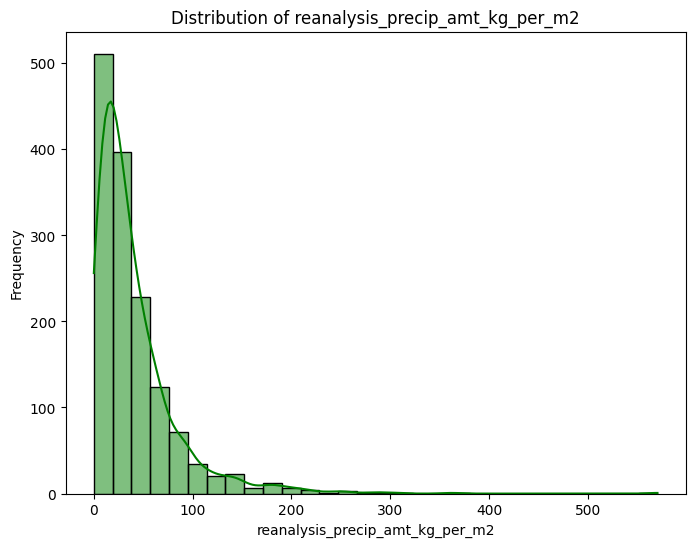

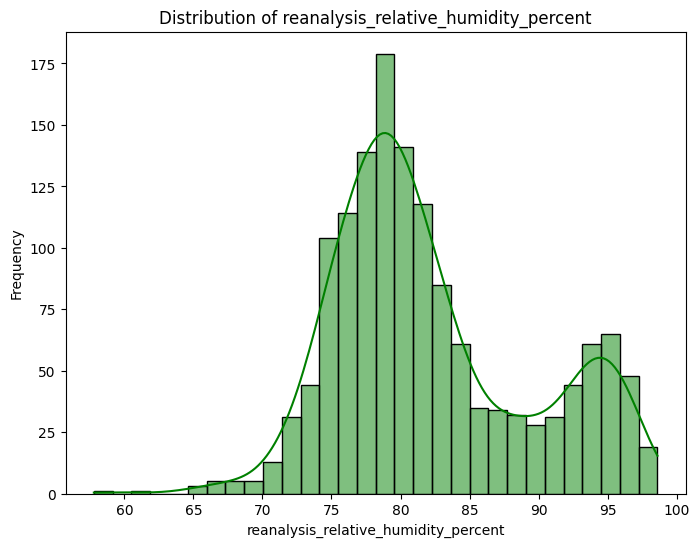

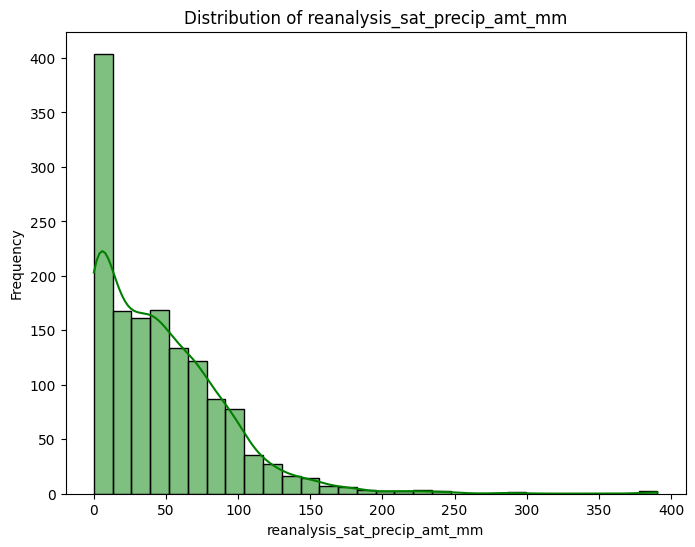

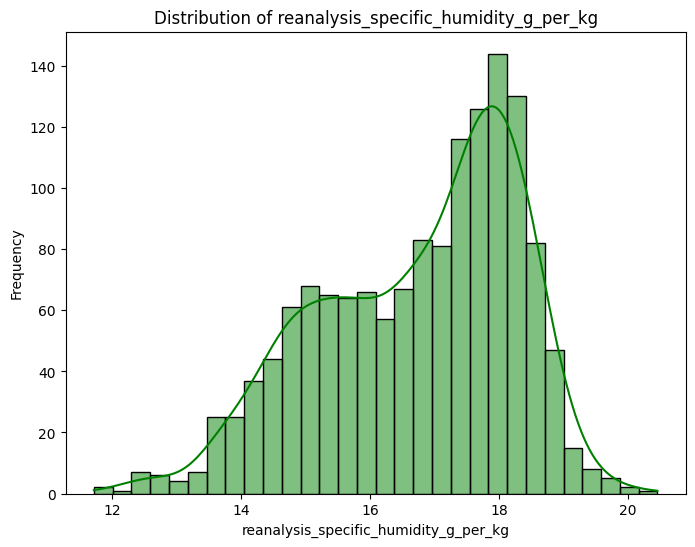

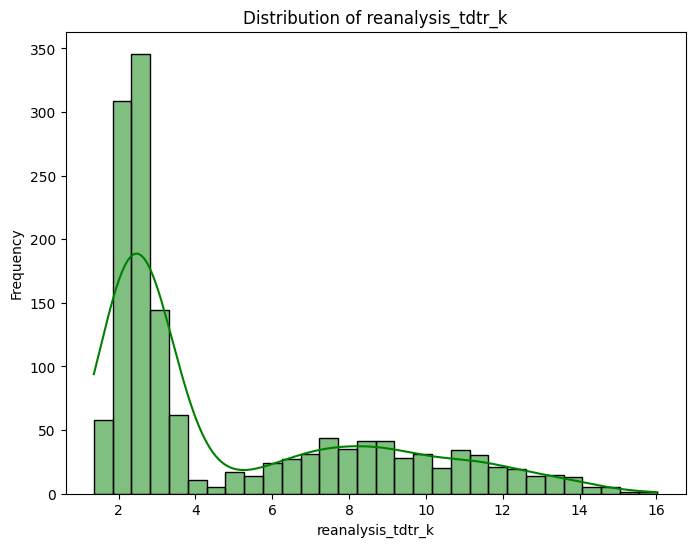

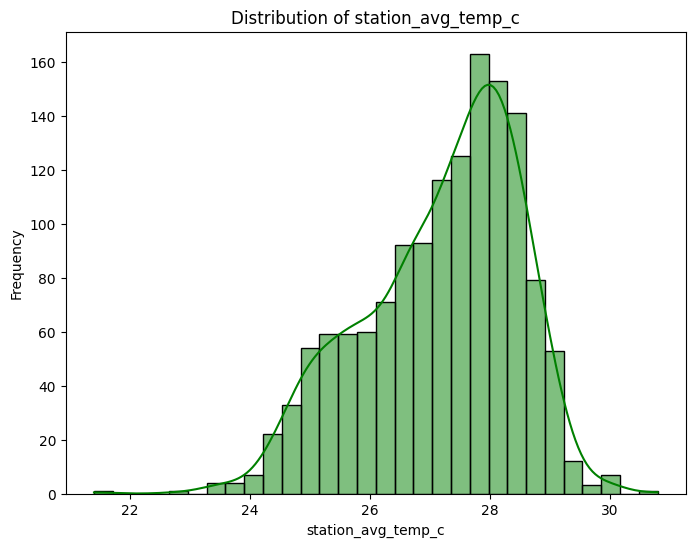

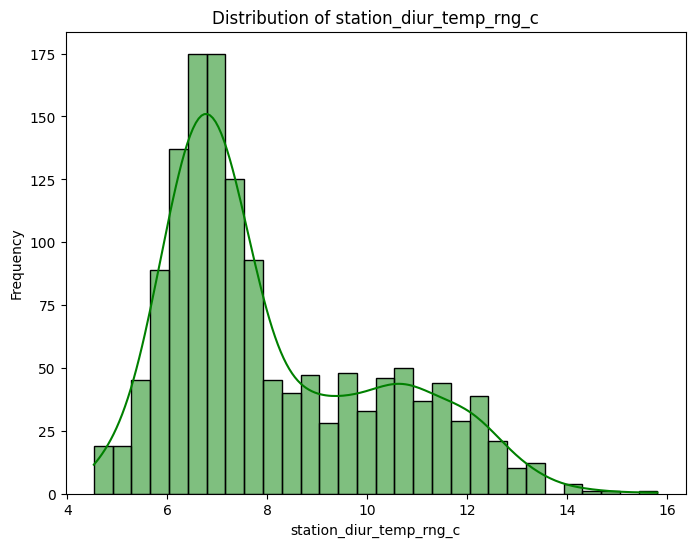

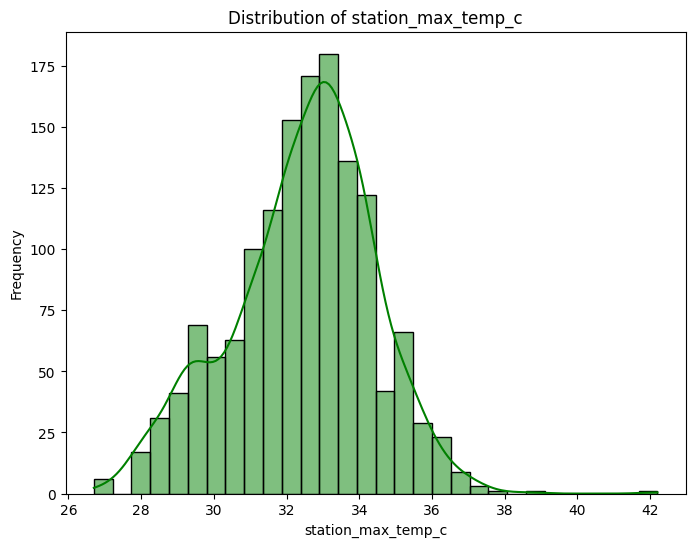

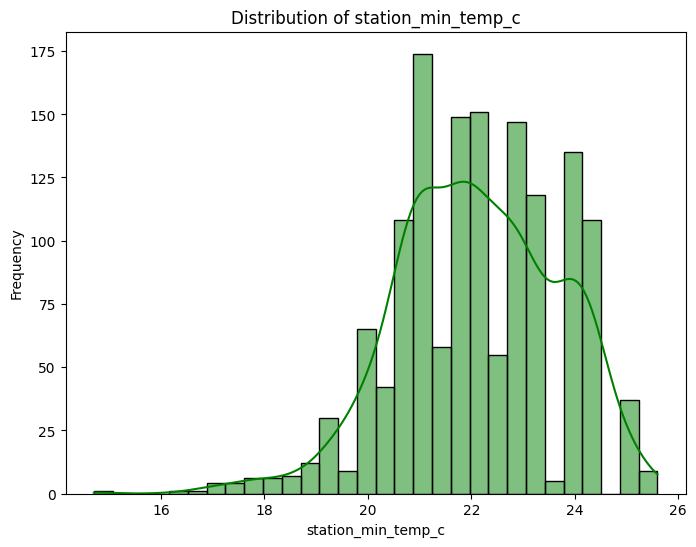

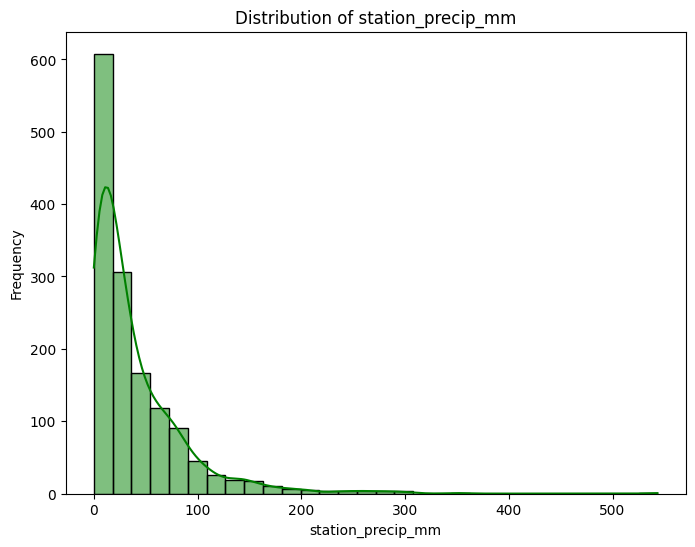

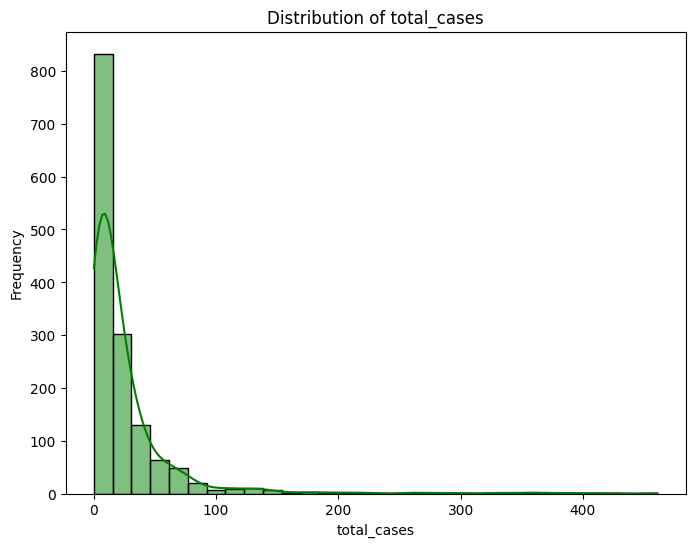

In [17]:
# coded by Kevein
# Histogram distribution of all the; variables.
numeric_features = data.select_dtypes(include=[float, int]).columns
for feature in numeric_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[feature], kde=True, color='green', bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

# these graph's show how each independent feature is distributed and can get informations like whether they are
# normally distributed or any skewness present in the distribution.

In [18]:
# coded by Kevein
# Dropping week_start_date column.
data.drop(columns=['week_start_date'], inplace=True)

In [19]:
# coded by Nikhil
# Converting city column into numeric column.
data['city'] = data['city'].map({'sj': 0, 'iq': 1})
data.head()

,city,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,0,1990,18,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,0,1990,19,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,0,1990,20,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,0,1990,21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,0,1990,22,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


In [20]:
# coded by Nikhil
# Filling missing values.
imputer = IterativeImputer(random_state=0)
data_imputed = imputer.fit_transform(data)
data_imputed = pd.DataFrame(data_imputed, columns=data.columns)
data_imputed.head()

,city,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,0.0,1990.0,18.0,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4.0
1,0.0,1990.0,19.0,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5.0
2,0.0,1990.0,20.0,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4.0
3,0.0,1990.0,21.0,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3.0
4,0.0,1990.0,22.0,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6.0


In [21]:
# coded by Nisarga
# Adding lagged features for temperature variable
data_imputed['lag_temp_1'] = data_imputed['reanalysis_air_temp_k'].shift(1)
data_imputed['lag_temp_2'] = data_imputed['reanalysis_air_temp_k'].shift(2)
data_imputed.fillna(method='bfill', inplace=True)

In [22]:
data_imputed.head()

,city,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,...,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases,lag_temp_1,lag_temp_2
0,0.0,1990.0,18.0,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,...,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4.0,297.572857,297.572857
1,0.0,1990.0,19.0,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,...,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5.0,297.572857,297.572857
2,0.0,1990.0,20.0,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,...,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4.0,298.211429,297.572857
3,0.0,1990.0,21.0,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,...,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3.0,298.781429,298.211429
4,0.0,1990.0,22.0,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,...,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6.0,298.987143,298.781429


In [23]:
# coded by Nisarga
# Setting dependent and independent features.
X = data_imputed.drop('total_cases', axis=1)
y = data_imputed['total_cases']

In [24]:
# Split the data into Train and test data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression

In [25]:
# coded by Nisarga
#Training Linear Regression model
from sklearn.linear_model import LinearRegression

# Linear regression
linear_reg = LinearRegression()

# Train the model
linear_reg.fit(X_train, y_train)

# Predict on the test set
y_pred_linear = linear_reg.predict(X_val)

# Calculating Mean Absolute Error
mae_linear = mean_absolute_error(y_val, y_pred_linear)
mae_linear


24.123753913249516

# Random Forest

In [26]:
# coded by Kevein
from sklearn.ensemble import RandomForestRegressor

# training the Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_val)

mae = mean_absolute_error(y_val, y_pred)
print('Mean Absolute Error:', mae)

Mean Absolute Error: 15.90027397260274


In [28]:
# coded by Kevein
# Hyper parameter tuning.

# setting the parameters.
param_grid_simple = {
    'n_estimators': [50, 100],
    'max_features': ['sqrt'],
    'max_depth': [None, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Using GridSearchCV to tune hyper parameter.
grid_search_simple = GridSearchCV(estimator=rf, param_grid=param_grid_simple, cv=3, n_jobs=-1,
                                  scoring='neg_mean_absolute_error', verbose=2)

# Training using all the parameters.
grid_search_simple.fit(X_train, y_train)

# Selecting gridsearchcv's best parameters
best_params_simple = grid_search_simple.best_params_
best_score_simple = -grid_search_simple.best_score_
best_params_simple, best_score_simple

Fitting 3 folds for each of 16 candidates, totalling 48 fits


({'max_depth': 20,
  'max_features': 'sqrt',
  'min_samples_leaf': 1,
  'min_samples_split': 5,
  'n_estimators': 100},
 np.float64(15.127197385650902))

In [29]:
# coded by Kevein
#  Setting the parameters to gridsearchcv's best parameters
best_params = {
    'max_depth': 20,
    'max_features': 'sqrt',
    'min_samples_leaf': 1,
    'min_samples_split': 5,
    'n_estimators': 100
}

# Training Random Forest model with gridsearchcv's best parameters.
rf_tuned = RandomForestRegressor(**best_params, random_state=42)

rf_tuned.fit(X_train, y_train)

y_pred_tuned = rf_tuned.predict(X_val)

mae_tuned = mean_absolute_error(y_val, y_pred_tuned)
mae_tuned


19.03704144188809

In [30]:
# coded by Kevein, Nisarga, Nikhil (Joint authorship)
# feature importances from the trained Random Forest model
feature_importances = rf_tuned.feature_importances_

importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sorting the feature importance of random forest model in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

importance_df
# coded by Kevein, Nisarga, Nikhil (Joint authorship)

,Feature,Importance
1,year,0.119330
2,weekofyear,0.098870
10,reanalysis_dew_point_temp_k,0.053311
12,reanalysis_min_air_temp_k,0.051968
23,lag_temp_1,0.051815
3,ndvi_ne,0.050218
16,reanalysis_specific_humidity_g_per_kg,0.050206
24,lag_temp_2,0.047424
17,reanalysis_tdtr_k,0.041803
4,ndvi_nw,0.039946


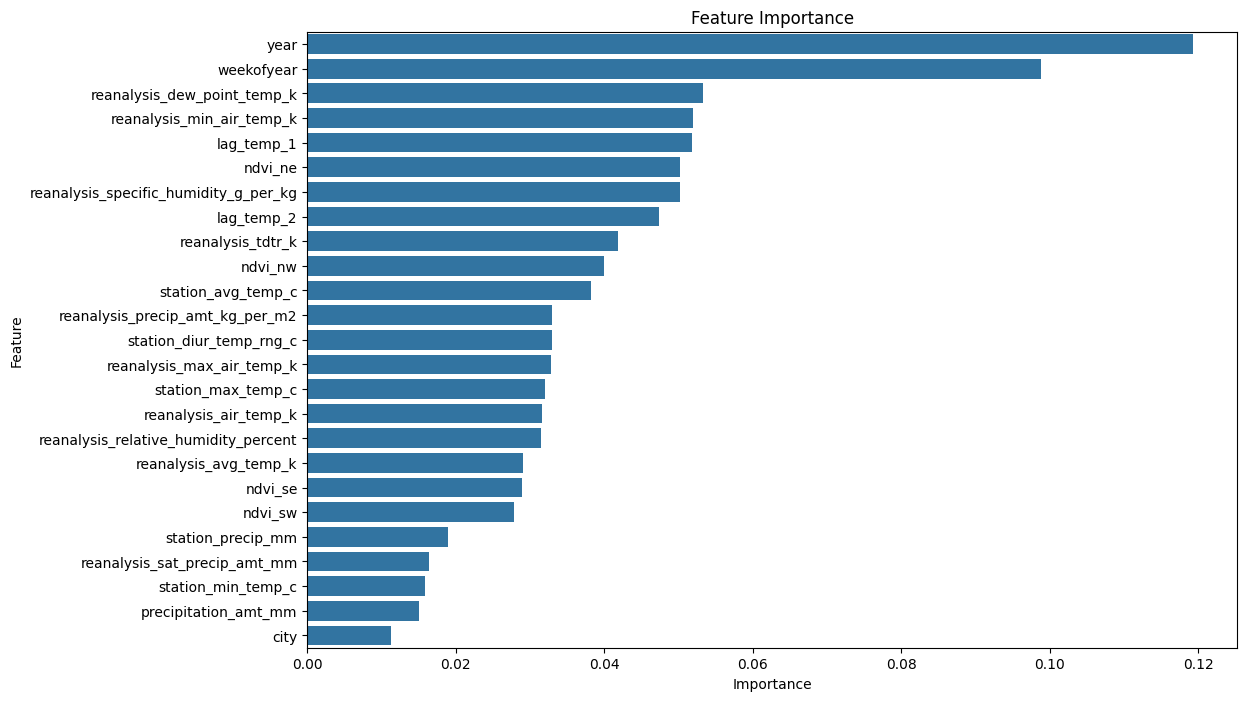

In [31]:
# coded by Kevein, Nisarga, Nikhil (Joint authorship)
# Plotting the Feature importance of random forest model.
feature_importance = rf_tuned.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

# This graph shows the feature which are useful in predicting the dengue cases in descending order.

In [32]:
# coded by Kevein, Nisarga, Nikhil (Joint authorship)
# Cross validation for Random Forest Modelfrom sklearn.model_selection import cross_val_score

from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation using the tuned Random Forest model
cv_scores = cross_val_score(rf_tuned, X, y, cv=5, scoring='neg_mean_absolute_error')

cv_mae = -cv_scores.mean()
cv_mae


np.float64(21.659599557185686)

# GradientBoostingRegressor

In [33]:
# Coded by Nikhil
# Trainig Gradient Boosting  Model.
from sklearn.ensemble import GradientBoostingRegressor

gb_regressor = GradientBoostingRegressor(random_state=42)

gb_regressor.fit(X_train, y_train)

y_pred_gb = gb_regressor.predict(X_val)

mae_gb = mean_absolute_error(y_val, y_pred_gb)
mae_gb

15.453803221561236

# XGBoost

In [34]:
# coded by Kevein, Nisarga, Nikhil (Joint authorship)
# Training XGBoost model
import xgboost as xgb

# Converting data into DMatrix format
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)

# Defining parameters for XGBoost mddel.
params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'mae',
    'seed': 42
}


xgb_model = xgb.train(params, dtrain, num_boost_round=100)

y_pred_xgb = xgb_model.predict(dval)

mae_xgb = mean_absolute_error(y_val, y_pred_xgb)
mae_xgb

12.840800887662661

In [35]:
# coded by Kevein, Nisarga, Nikhil (Joint authorship)
# Hyper parameter tuning for XGBoost model.

# Convert data into DMatrix format
dtrain = xgb.DMatrix(X_train, label=y_train)

# Define the parameter grid
param_grid = {
    'max_depth': [3, 6, 9],
    'learning_rate': [0.1, 0.05, 0.01],
    'n_estimators': [100, 200, 300],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

xgb_regressor = xgb.XGBRegressor(objective='reg:squarederror', seed=42)

#Setting up the grid search
grid_search_xgb = GridSearchCV(estimator=xgb_regressor, param_grid=param_grid, cv=3, n_jobs=-1,
                               scoring='neg_mean_absolute_error', verbose=2)

grid_search_xgb.fit(X_train, y_train)

best_params_xgb = grid_search_xgb.best_params_
best_score_xgb = -grid_search_xgb.best_score_
best_params_xgb, best_score_xgb


Fitting 3 folds for each of 729 candidates, totalling 2187 fits


({'colsample_bytree': 0.9,
  'gamma': 0.1,
  'learning_rate': 0.05,
  'max_depth': 6,
  'n_estimators': 200,
  'subsample': 0.9},
 np.float64(11.785710363127164))

In [38]:
# coded by Kevein, Nisarga, Nikhil (Joint authorship)
# Define the gridsearchcv's best parameters which we got using hyper parameter tuining.
params = {
    'colsample_bytree': 0.9,
    'gamma': 0.1,
    'learning_rate': 0.05,
    'max_depth': 6,
    'n_estimators': 200,
    'subsample': 0.9,
    'objective': 'reg:squarederror',
    'seed': 42
}

dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)

xgb_model = xgb.train(params, dtrain, num_boost_round=params['n_estimators'])

y_pred_xgb = xgb_model.predict(dval)

mae_xgb = mean_absolute_error(y_val, y_pred_xgb)
mae_xgb


12.608128800069633

In [39]:
# coded by Kevein, Nisarga, Nikhil (Joint authorship)
# Cross validation for XGBoost model.

#  performing cross validation using gridsearchcv's best parameters
xgb_model_final = xgb.XGBRegressor(colsample_bytree=1.0, gamma=0, learning_rate=0.05,
                               max_depth=6, n_estimators=300, subsample=0.8, random_state=42)

mae_scores = cross_val_score(xgb_model_final, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
mae_scores = -mae_scores
mean_mae_score = mae_scores.mean()
print("Mean Absolute Error (MAE) Score:", mean_mae_score)


Mean Absolute Error (MAE) Score: 10.827396369252762


# Test data

In [40]:
# coded by Kevein, Nisarga, Nikhil (Joint authorship)
# Load the test data
test_data = pd.read_csv('/DSML /dengue_features_test.csv')

In [41]:
# coded by Kevein, Nisarga, Nikhil (Joint authorship)
# Convert 'city' column to numeric column
test_data['city'] = test_data['city'].map({'sj': 0, 'iq': 1})

# Drop 'week_start_date'
features_to_exclude = ['week_start_date']
test_data_numeric = test_data.drop(columns=features_to_exclude)

# Handling missing values
imputer = IterativeImputer(random_state=0)
test_data_imputed = imputer.fit_transform(test_data_numeric)
test_data_imputed = pd.DataFrame(test_data_imputed, columns=test_data_numeric.columns)

# Add lagged temperature features for test data
test_data_imputed['lag_temp_1'] = test_data_imputed['reanalysis_air_temp_k'].shift(1)
test_data_imputed['lag_temp_2'] = test_data_imputed['reanalysis_air_temp_k'].shift(2)
test_data_imputed.fillna(method='bfill', inplace=True)  # Backfill any NaN values that appear from shifting

In [42]:
# coded by Kevein, Nisarga, Nikhil (Joint authorship)
#  training the XGBoost model
xgb_params = {
    'colsample_bytree': 1.0,
    'gamma': 0,
    'learning_rate': 0.05,
    'max_depth': 6,
    'n_estimators': 300,
    'subsample': 0.8,
    'objective': 'reg:squarederror',
    'seed': 42
}

xgb_model = xgb.XGBRegressor(**xgb_params)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=0, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=300,
             n_jobs=None, num_parallel_tree=None, ...)

In [43]:
# coded by Kevein, Nisarga, Nikhil (Joint authorship)
# Predict using the XGBoost model
predictions = xgb_model.predict(test_data_imputed)

In [44]:
# coded by Kevein, Nisarga, Nikhil (Joint authorship)
test_data_relevant = test_data[['city', 'year', 'weekofyear']]
test_data_relevant['year'] = test_data_relevant['year'].astype(int)
test_data_relevant['weekofyear'] = test_data_relevant['weekofyear'].astype(int)
test_data_relevant['total_cases'] = predictions.astype(int)



In [ ]:
'''# path to save the Excel file
excel_output_path = "Predicted_Dengue_Cases.xlsx"

# Saving the excel file
test_data_relevant.to_excel(excel_output_path, index=False)

print(f"File saved successfully at {excel_output_path}")'''